In [1]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib import colors
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import re, seaborn as sns
from membatross_functions import data_preprocessing
from membatross_functions import data_analysis

## Data Preparation & Visualization


In [2]:
feature_embeddings = data_preprocessing.generate_feature_embeddings('../data/membatross_embeddings.npy')
mean_concept_in_feat = data_preprocessing.generate_concept_loadings('../data/membatross_embeddings.npy', '../data/spose_embedding_49d_sorted.txt')
mean_concept_in_feat = data_preprocessing.merge_memorability(mean_concept_in_feat, '../data/THINGS_Table.csv')
mean_concept_in_feat = data_preprocessing.merge_category(mean_concept_in_feat, '../data/categories.mat')
concept_typ_rated = data_preprocessing.load_rated_typicality('../data/typicality_data27.mat')
original_embeddings = np.loadtxt('../data/spose_embedding_49d_sorted.txt')
mean_concept_in_feat


,0,1,2,cr,bigcat,concept_name,cat_name
0,-8.362256,5.447828,-8.557188,0.779739,1,aardvark,animal
1,-26.123590,12.240625,0.518939,0.798485,13,abacus,home decor
2,-24.385152,14.180849,0.693800,0.752845,18,accordion,musical instrument
3,-25.107906,9.416656,-2.846510,0.761851,99,acorn,NaN
4,-20.330699,11.947785,-4.992442,0.794466,9,air_conditioner,electronic device
...,...,...,...,...,...,...,...
1849,-17.319193,11.068469,0.200732,0.722655,99,yoke,NaN
1850,-19.551059,2.813812,-2.150868,0.843158,10,yolk,food
1851,-14.748351,9.486465,-8.609210,0.800163,1,zebra,animal
1852,-15.327696,12.965252,0.600495,0.797468,99,zipper,NaN


<IPython.core.display.Javascript object>


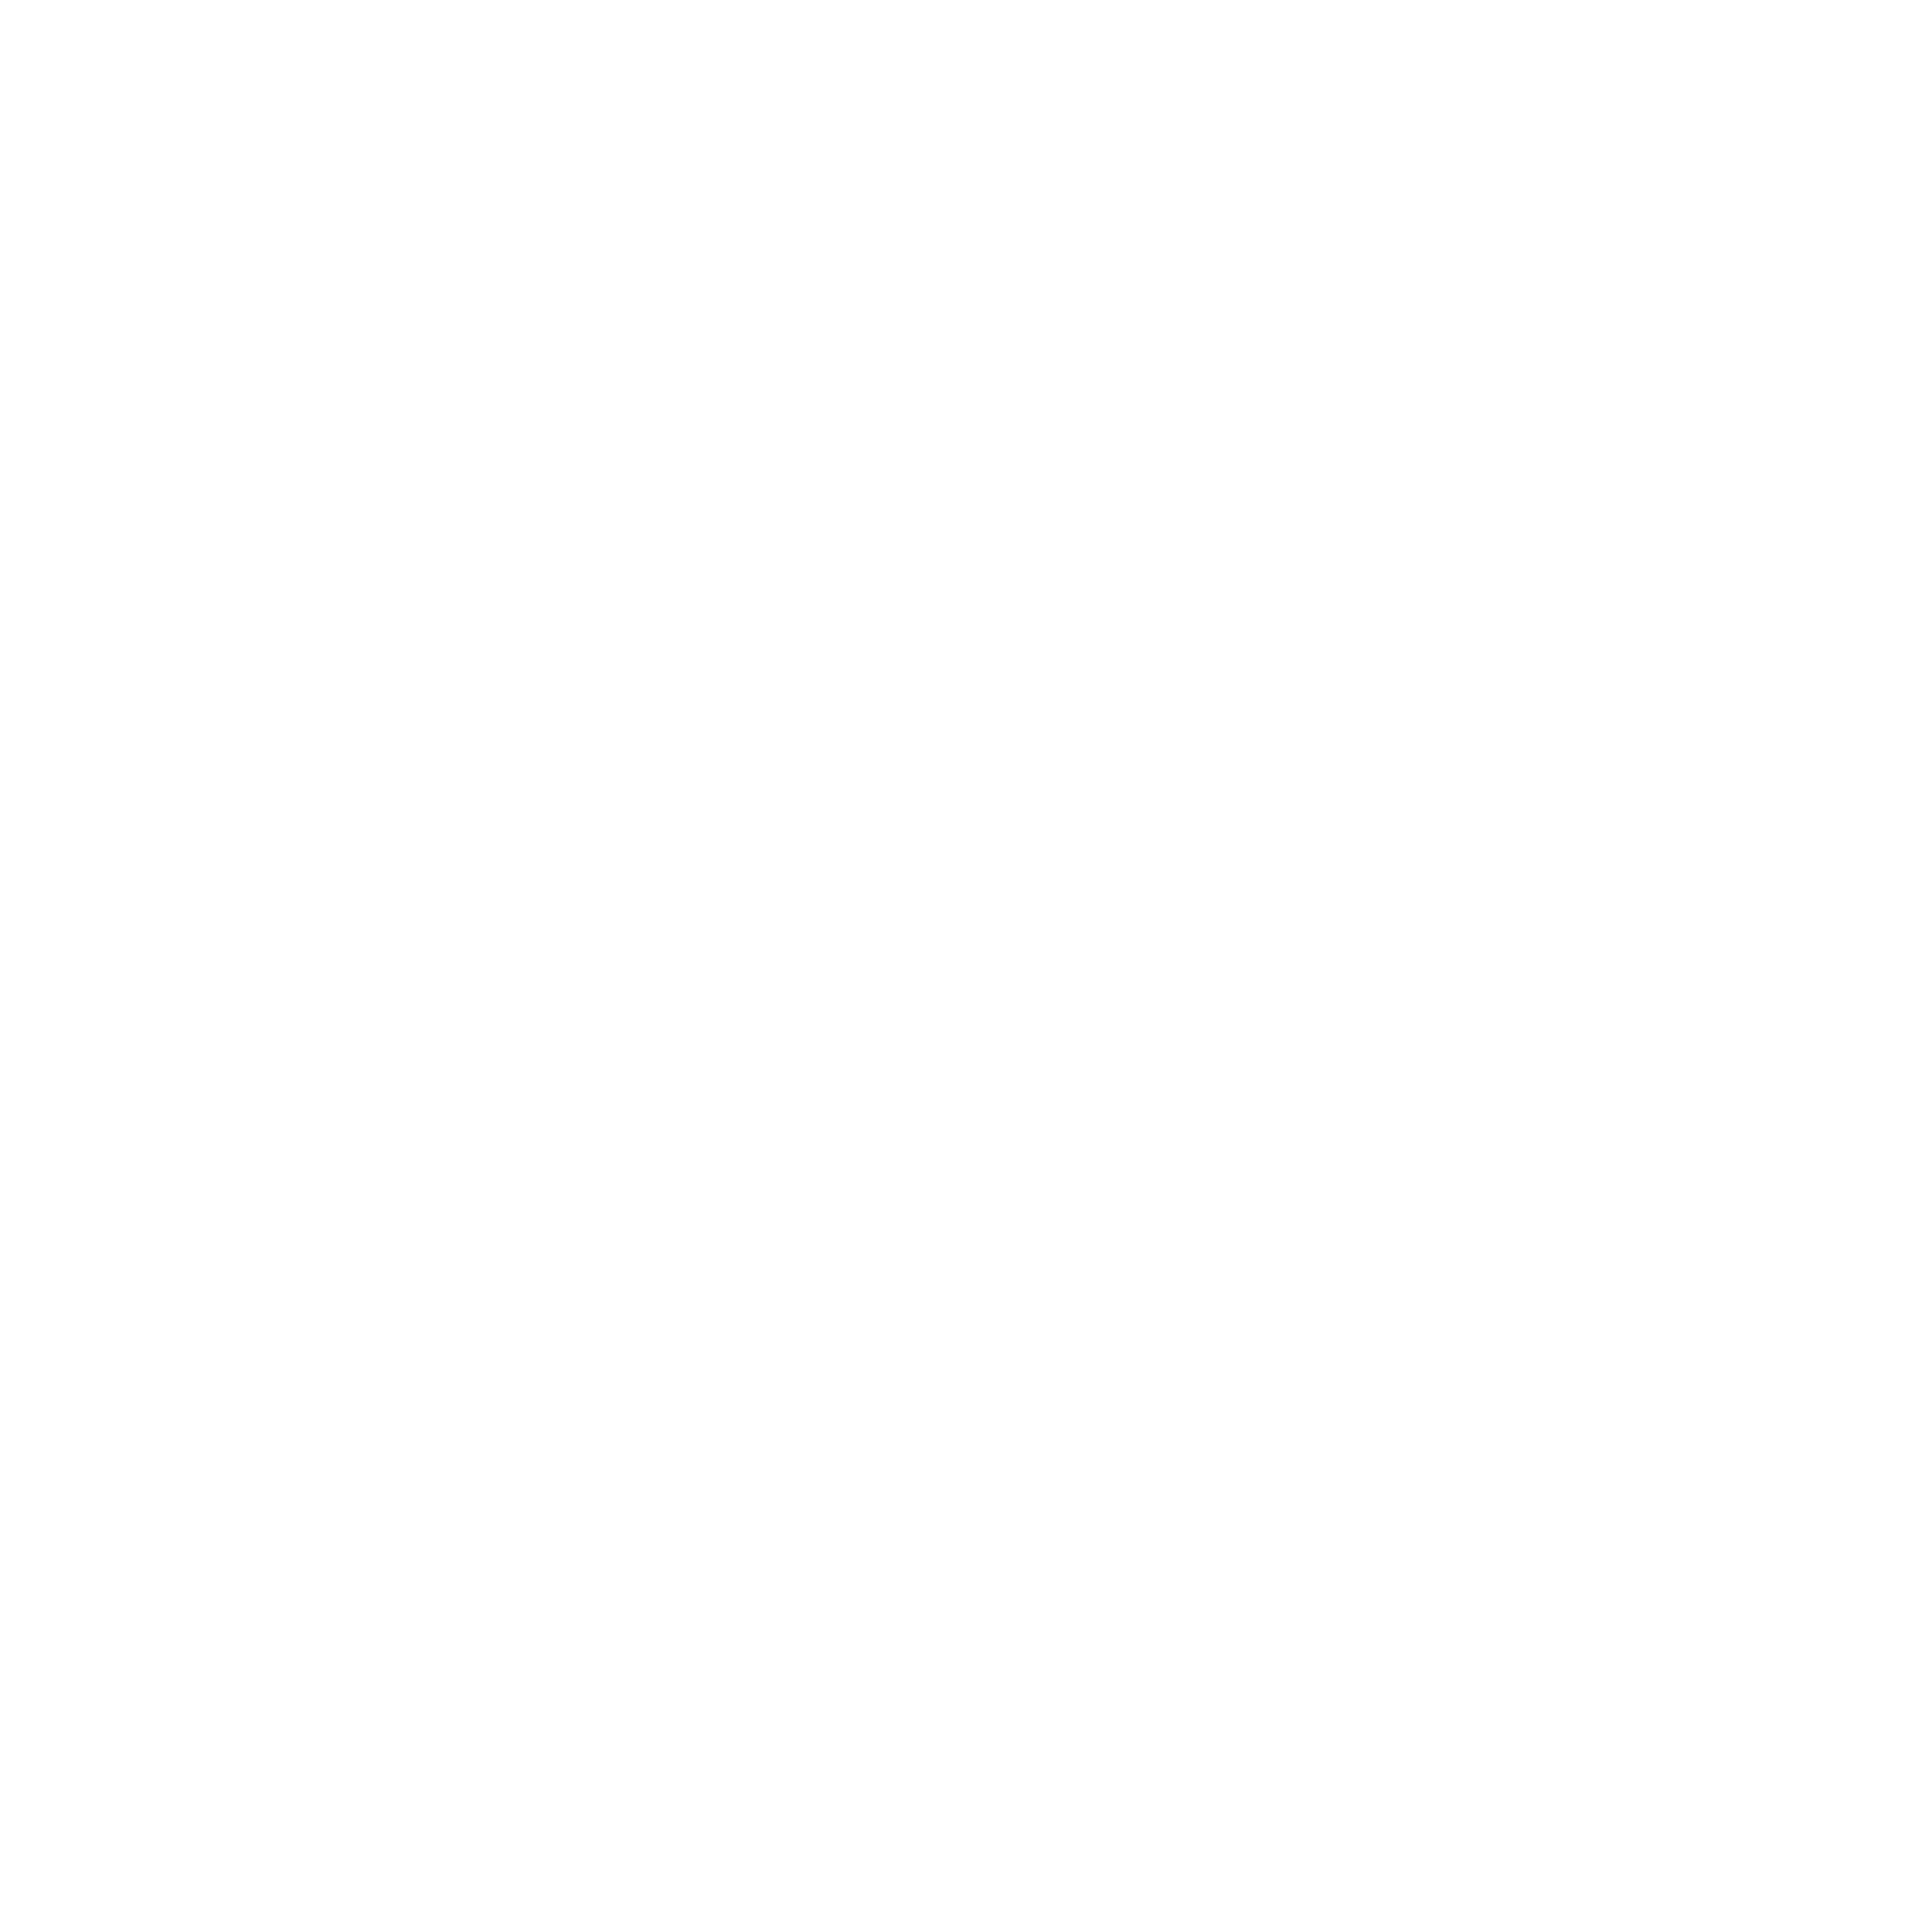

In [3]:
### Visualization: rotating animation of 49 features and 1854 concepts in 3D hyperbolic space
from matplotlib import animation
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

# ax.axes.set_xlim3d(left=-30, right=20) 
# ax.axes.set_ylim3d(bottom=-30, top=20) 
# ax.axes.set_zlim3d(bottom=-30, top=20) 
concept_cat = ax.scatter(mean_concept_in_feat[0], mean_concept_in_feat[1], mean_concept_in_feat[2], alpha=0.6) 

ax.scatter(feature_embeddings.T[0], feature_embeddings.T[1], feature_embeddings.T[2], color='red')


def animate(frame):
    ax.view_init(60, frame)
    plt.pause(.0001)
    return fig

# anim = animation.FuncAnimation(fig, animate, frames=50, interval=.1, repeat=True)
# anim.save('../outputs/feat_concept_rotate.gif', writer='pillow')


plt.show()

<IPython.core.display.Javascript object>


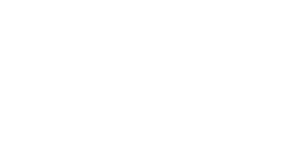

In [4]:
### Visualization: animation of max radius, features and concepts
from matplotlib import animation
import matplotlib
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 21 * np.outer(np.cos(u), np.sin(v))
y = 21 * np.outer(np.sin(u), np.sin(v))
z = 21 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.azim = 70
ax.dist = 10
ax.elev = 20

def update(i):
    if i == 0:
        ax.clear()
        ax.plot_surface(x, y, z,  rstride=4, cstride=4, linewidth=0, alpha=0.1)
        ax.quiver(0,0,0,21,0,0,arrow_length_ratio=0.01, color='b')
        ax.text(15,0,1,'r=21',size=15, color='b')
    elif i == 1:
        ax.scatter(feature_embeddings.T[0], feature_embeddings.T[1], feature_embeddings.T[2], color='red')
    else:
        ax.scatter(mean_concept_in_feat[0], mean_concept_in_feat[1], mean_concept_in_feat[2])
    ax.axes.set_xlim3d(left=-30, right=20) 
    ax.axes.set_ylim3d(bottom=-30, top=20) 
    ax.axes.set_zlim3d(bottom=-30, top=20) 

ani = animation.FuncAnimation(fig, update, frames=3, interval=1000)
# ani.save('../outputs/sphere_feat_concept.gif', writer='pillow')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# plt.savefig('../outputs/sphere.pdf')
plt.show()

<IPython.core.display.Javascript object>


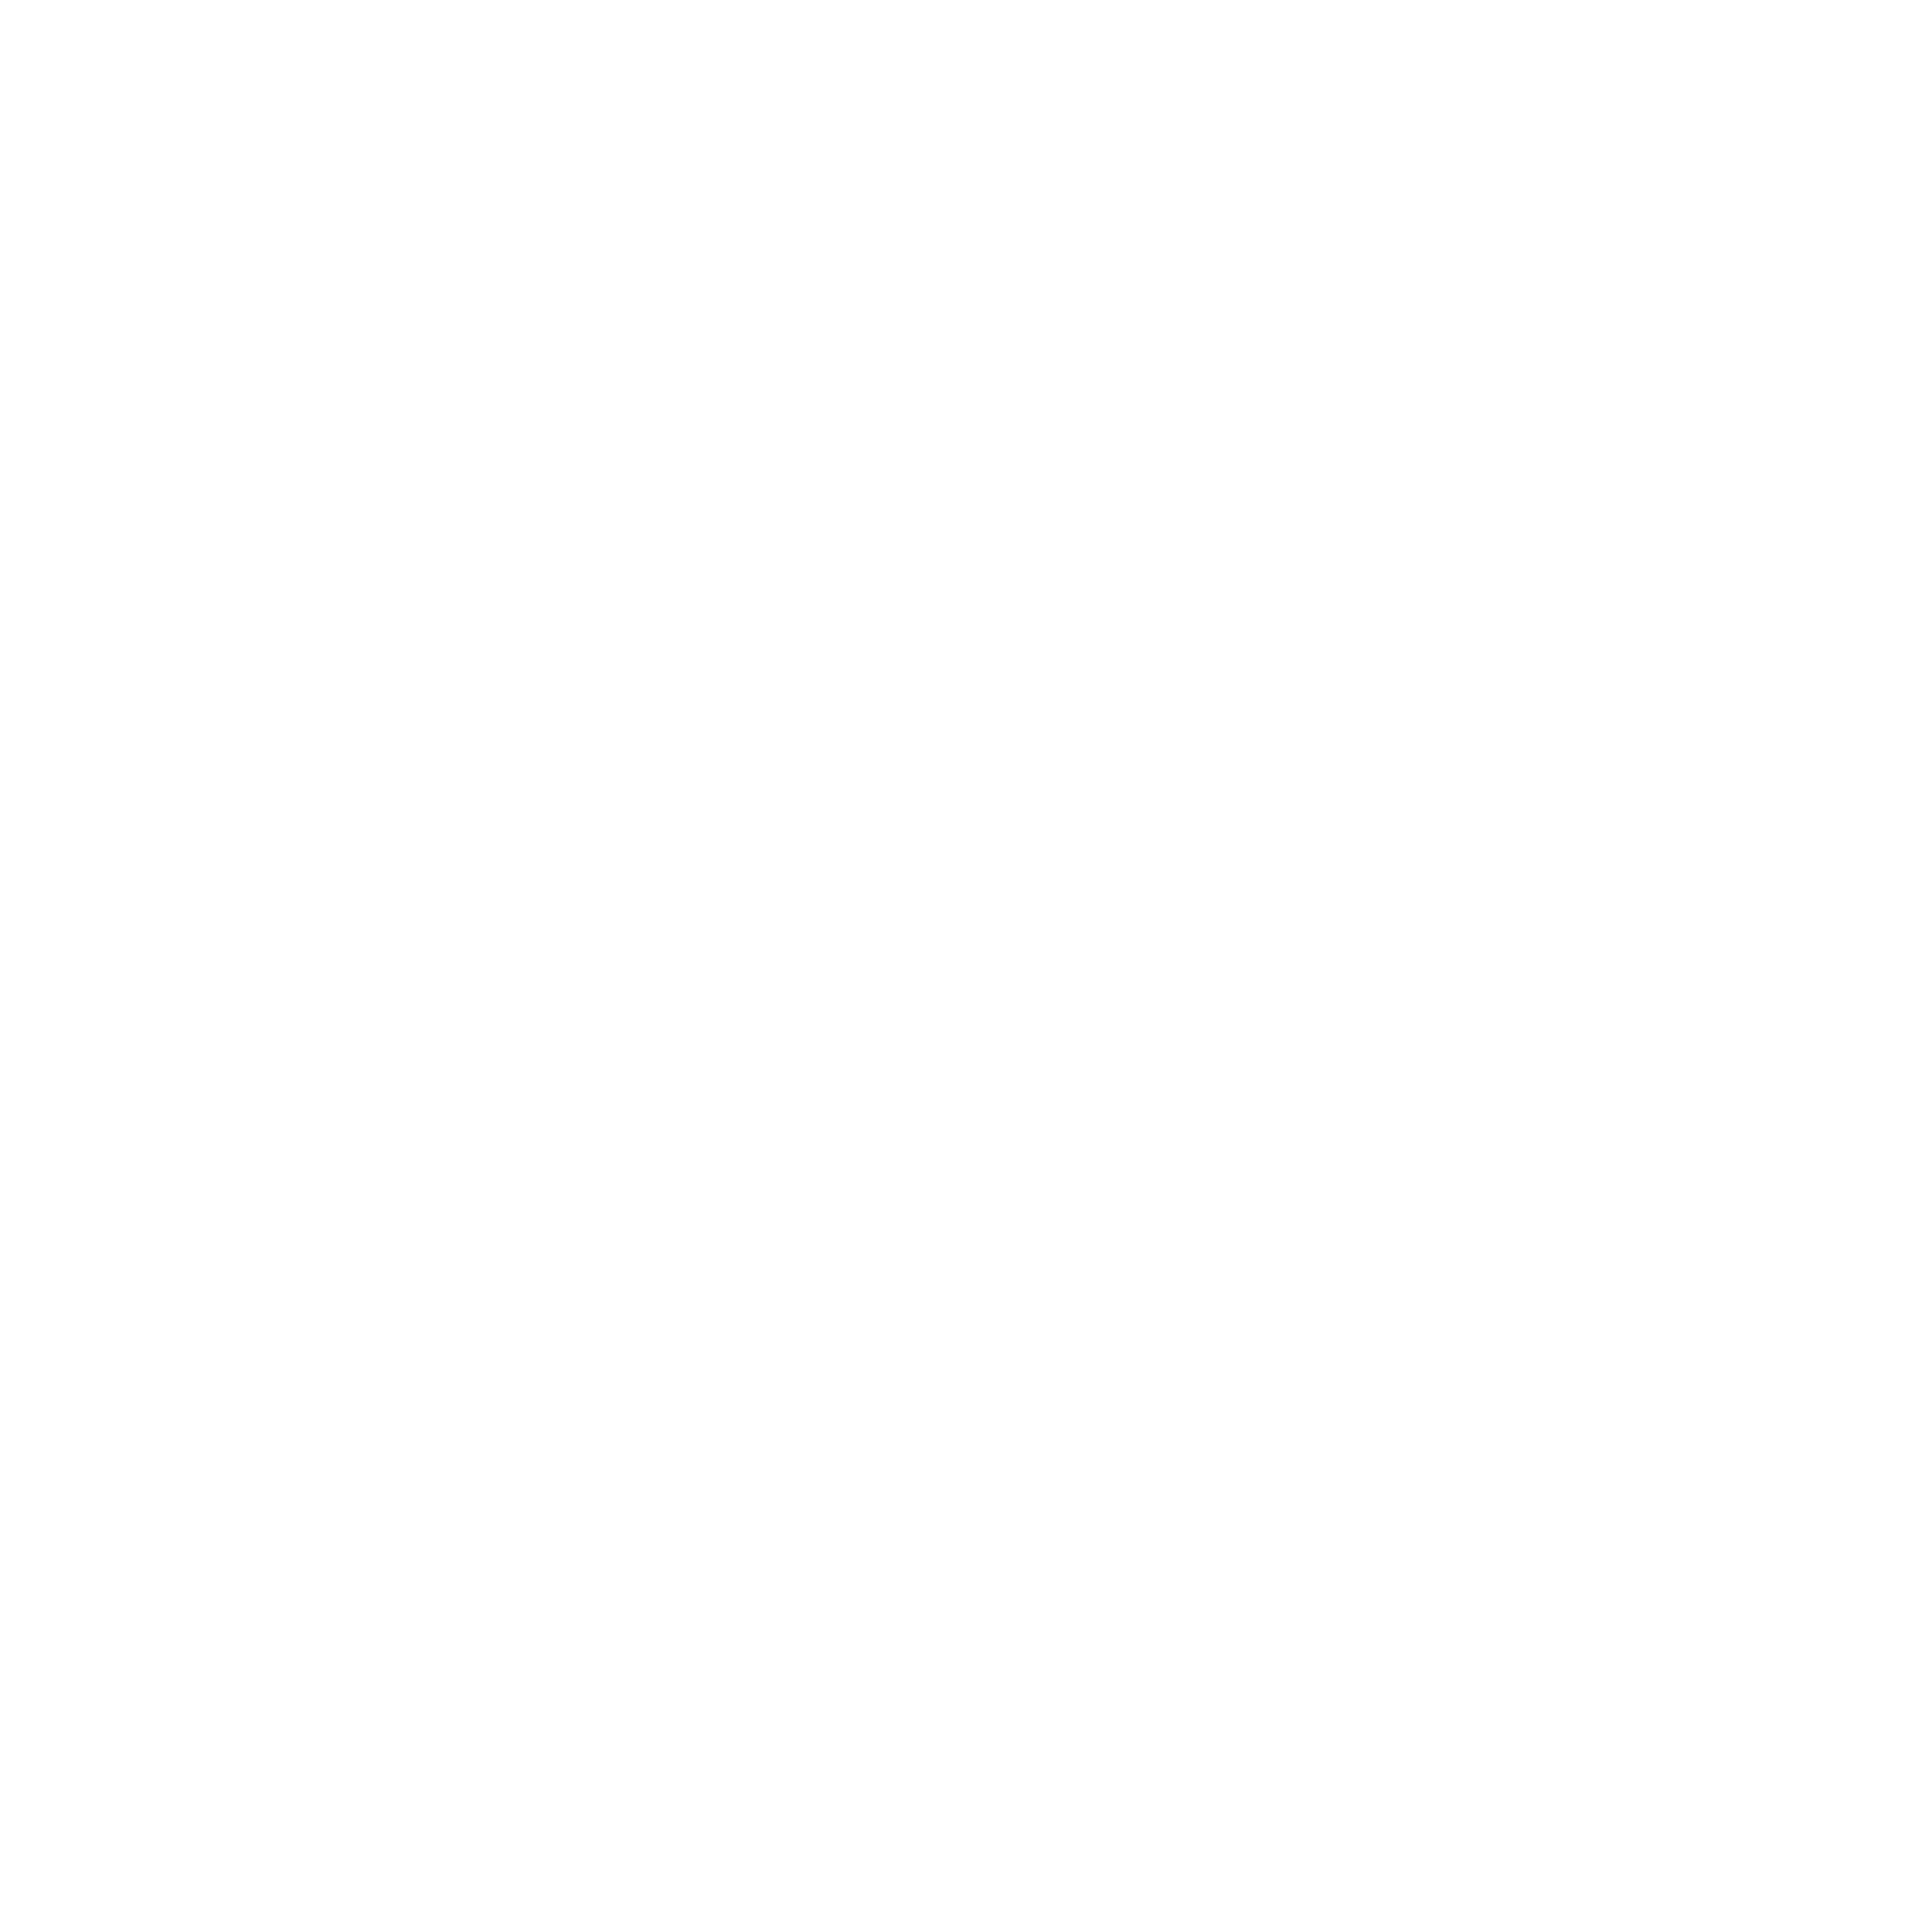

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


In [5]:
### Visualization: animation of one concept being linear combination of all 49 features
from matplotlib import animation
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

positions = []
temp = [0,0,0]
for col in range(len(original_embeddings[0])):
    positions.append(temp + np.array([original_embeddings[0][col]*feature_embeddings[col,0], original_embeddings[0][col]*feature_embeddings[col,1], original_embeddings[0][col]*feature_embeddings[col,2]]))
    temp = positions[-1]

def update(i):
    ax.clear()
    ax.scatter(positions[i][0], positions[i][1], positions[i][2], c='b')
    ax.text(positions[i][0], positions[i][1], positions[i][2], i+1)
    ax.scatter(feature_embeddings[i][0], feature_embeddings[i][1], feature_embeddings[i][2], color='purple')
    ax.scatter(feature_embeddings.T[0], feature_embeddings.T[1], feature_embeddings.T[2], color='red', alpha=0.4)
    ax.axes.set_xlim3d(left=-30, right=20) 
    ax.axes.set_ylim3d(bottom=-30, top=20) 
    ax.axes.set_zlim3d(bottom=-30, top=20) 

ani = animation.FuncAnimation(fig, update, frames=49, interval=200)
# ani.save('../outputs/lin_comb_concept.gif', writer='pillow')

    
plt.show()

## Analysis: coordinates vs. memorability

### Cartesian coordinates
Cartesian coordinates of concepts explained 9.8% of variance in memorability, where x axis is most influential in memorability, while memorability decreased as coordinates going positively along y and z axes. 

In [6]:
### linreg: cartesian coordinates and z-score memorability
zscore_mem = stats.zscore(mean_concept_in_feat['cr'])
mean_concept_constant = sm.add_constant(mean_concept_in_feat[[0,1,2]], prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     66.84
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           4.92e-41
Time:                        17:39:53   Log-Likelihood:                -2535.3
No. Observations:                1854   AIC:                             5079.
Df Residuals:                    1850   BIC:                             5101.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0785      0.006     13.998      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Radius
Predicting memorability using radius: radius of concepts in the hyperbolic space explained even smaller variance in memorability. Concepts that have shorter radius are closer to the core of the space and are more memorable. 

<IPython.core.display.Javascript object>


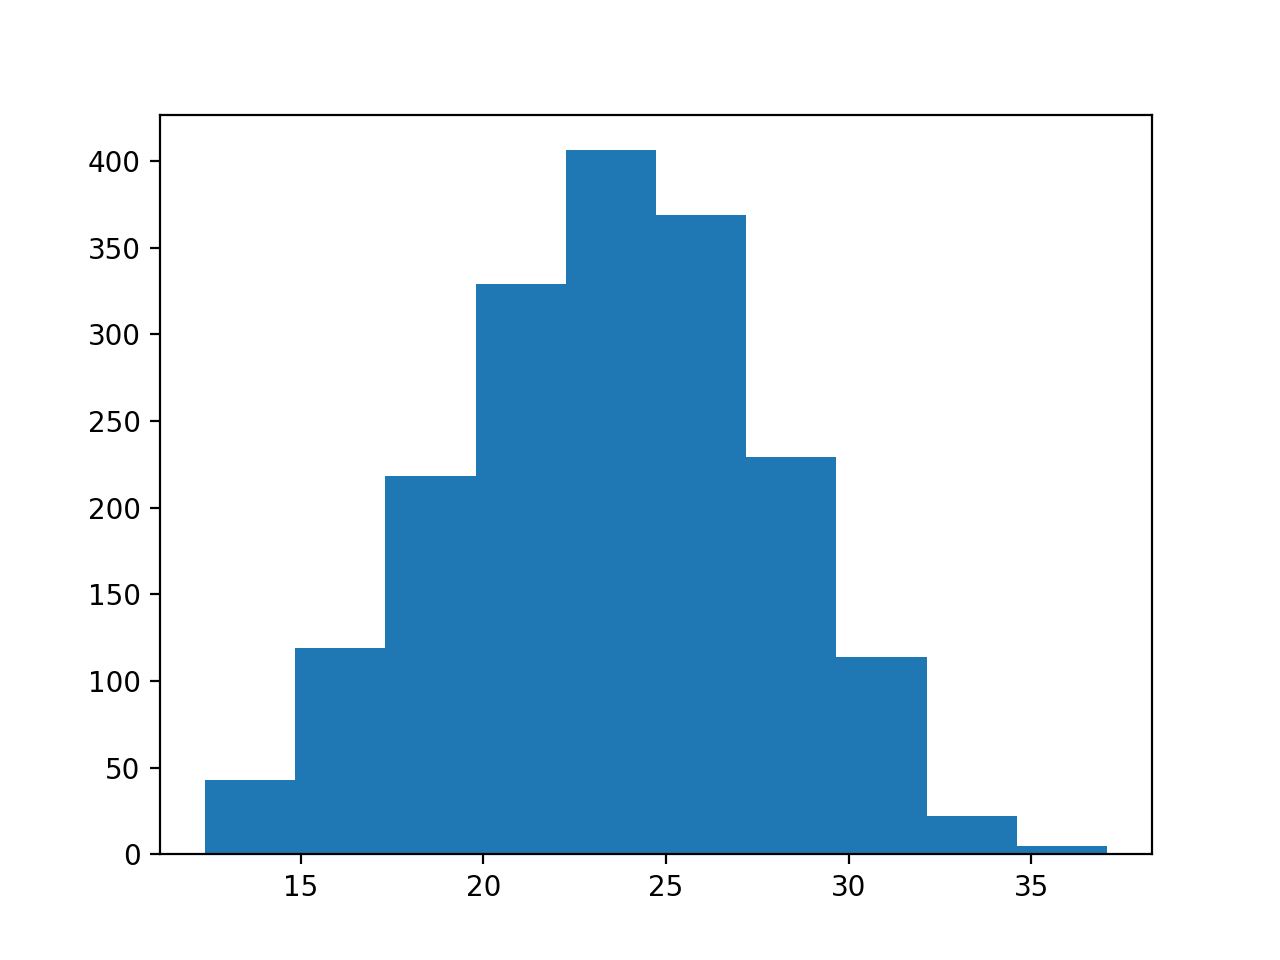

(array([ 43., 119., 218., 329., 406., 369., 229., 114.,  22.,   5.]),
 array([12.38486087, 14.85297531, 17.32108974, 19.78920417, 22.25731861,
        24.72543304, 27.19354747, 29.66166191, 32.12977634, 34.59789077,
        37.06600521]),
 <BarContainer object of 10 artists>)

In [7]:
### Radius
%matplotlib notebook
concept_radius_in_feat = np.sqrt((mean_concept_in_feat[[0,1,2]]**2).sum(1))

plt.clf()
plt.hist(concept_radius_in_feat)

In [8]:
### Radius vs. memorability
zscore_mem = stats.zscore(mean_concept_in_feat['cr'])
mean_concept_radius_const = sm.add_constant(concept_radius_in_feat, prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_radius_const)

res = mod.fit()
print(res.summary(xname=['radius','const']))

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     71.58
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           5.33e-17
Time:                        17:39:53   Log-Likelihood:                -2595.6
No. Observations:                1854   AIC:                             5195.
Df Residuals:                    1852   BIC:                             5206.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
radius        -0.0451      0.005     -8.460      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Analysis: typicality & memorability


### Within-category typicality

In [9]:
mean_concept_in_feat = mean_concept_in_feat.groupby('bigcat')
mean_concept_in_feat = mean_concept_in_feat.apply(lambda x: data_analysis.within_category_typicality(x, original_embeddings))
mean_concept_in_feat

,0,1,2,cr,bigcat,concept_name,cat_name,typicality
0,-8.362256,5.447828,-8.557188,0.779739,1,aardvark,animal,0.810913
1,-26.123590,12.240625,0.518939,0.798485,13,abacus,home decor,0.247628
2,-24.385152,14.180849,0.693800,0.752845,18,accordion,musical instrument,0.624589
3,-25.107906,9.416656,-2.846510,0.761851,99,acorn,NaN,0.070485
4,-20.330699,11.947785,-4.992442,0.794466,9,air_conditioner,electronic device,0.522380
...,...,...,...,...,...,...,...,...
1849,-17.319193,11.068469,0.200732,0.722655,99,yoke,NaN,0.267551
1850,-19.551059,2.813812,-2.150868,0.843158,10,yolk,food,0.770485
1851,-14.748351,9.486465,-8.609210,0.800163,1,zebra,animal,0.764335
1852,-15.327696,12.965252,0.600495,0.797468,99,zipper,NaN,0.290387


In [10]:
### Cartesian coordinates vs. typicality
zscore_mem = stats.zscore(mean_concept_in_feat['typicality'])
mean_concept_constant = sm.add_constant(mean_concept_in_feat[[0,1,2]], prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             typicality   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     462.9
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          2.57e-224
Time:                        17:39:53   Log-Likelihood:                -2111.6
No. Observations:                1854   AIC:                             4231.
Df Residuals:                    1850   BIC:                             4253.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0997      0.004     22.360      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [11]:
### Radius vs. typicality
concept_radius_typ = np.sqrt((mean_concept_in_feat[[0,1,2]]**2).sum(1))
zscore_mem = stats.zscore(mean_concept_in_feat['typicality'])
mean_concept_constant = sm.add_constant(concept_radius_typ, prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary(xname=['radius', 'const']))


                            OLS Regression Results                            
Dep. Variable:             typicality   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     1014.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          8.17e-178
Time:                        17:39:53   Log-Likelihood:                -2226.0
No. Observations:                1854   AIC:                             4456.
Df Residuals:                    1852   BIC:                             4467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
radius        -0.1390      0.004    -31.841      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
### typicality vs. memorability
zscore_mem = stats.zscore(mean_concept_in_feat['cr'])
mean_concept_constant = sm.add_constant(mean_concept_in_feat['typicality'], prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     40.55
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           2.41e-10
Time:                        17:39:53   Log-Likelihood:                -2610.6
No. Observations:                1854   AIC:                             5225.
Df Residuals:                    1852   BIC:                             5236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
typicality     0.5893      0.093      6.368      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
### Cartesian coordinates and typicality vs. memorability
zscore_mem = stats.zscore(mean_concept_in_feat['cr'])
mean_concept_constant = sm.add_constant(np.array(mean_concept_in_feat[[0,1,2,'typicality']]), prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     50.35
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           2.83e-40
Time:                        17:39:53   Log-Likelihood:                -2534.9
No. Observations:                1854   AIC:                             5080.
Df Residuals:                    1849   BIC:                             5107.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0757      0.006     11.986      0.0

In [14]:
### Radius and typicality vs. memorability
zscore_mem = stats.zscore(mean_concept_in_feat['cr'])
mean_concept_constant = sm.add_constant(np.array([concept_radius_typ, mean_concept_in_feat['typicality']]).T, prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary(xname=['radius', 'typicality', 'const']))

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     37.32
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           1.29e-16
Time:                        17:39:53   Log-Likelihood:                -2594.1
No. Observations:                1854   AIC:                             5194.
Df Residuals:                    1851   BIC:                             5211.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
radius        -0.0383      0.007     -5.777      0.0

### Contrast typicality

In [15]:
typ_eu_avg = data_analysis.get_contrast_cat_typ(mean_concept_in_feat, 'eu', 'bigcat', 'avg')
typ_eu_avg['radius'] = np.sqrt((typ_eu_avg[[0,1,2]]**2).sum(1))

zscore_mem = stats.zscore(typ_eu_avg['cr'])
concept_constant = sm.add_constant(typ_eu_avg[['radius', 'typ_contrast']], prepend=False)
mod = sm.OLS(zscore_mem, concept_constant)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     107.7
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           5.77e-45
Time:                        17:39:58   Log-Likelihood:                -2528.7
No. Observations:                1854   AIC:                             5063.
Df Residuals:                    1851   BIC:                             5080.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
radius          -0.0273      0.005     -5.095   

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
typ_eu_min = data_analysis.get_contrast_cat_typ(mean_concept_in_feat, 'eu', 'bigcat', 'min')
typ_eu_min['radius'] = np.sqrt((typ_eu_min[[0,1,2]]**2).sum(1))

zscore_mem = stats.zscore(typ_eu_min['cr'])
concept_constant = sm.add_constant(typ_eu_min[['radius', 'typ_contrast']], prepend=False)
mod = sm.OLS(zscore_mem, concept_constant)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     41.44
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           2.47e-18
Time:                        17:40:03   Log-Likelihood:                -2590.1
No. Observations:                1854   AIC:                             5186.
Df Residuals:                    1851   BIC:                             5203.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
radius          -0.0382      0.006     -6.698   

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
typ_hbp_avg = data_analysis.get_contrast_cat_typ(mean_concept_in_feat, 'hbp', 'bigcat', 'avg')
typ_hbp_avg['radius'] = np.sqrt((typ_hbp_avg[[0,1,2]]**2).sum(1))

zscore_mem = stats.zscore(typ_hbp_avg['cr'])
concept_constant = sm.add_constant(typ_hbp_avg[['radius', 'typ_contrast']], prepend=False)
mod = sm.OLS(zscore_mem, concept_constant)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     115.1
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           7.91e-48
Time:                        17:41:49   Log-Likelihood:                -2522.1
No. Observations:                1854   AIC:                             5050.
Df Residuals:                    1851   BIC:                             5067.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
radius          -0.3560      0.026    -13.864   

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
typ_hbp_min = data_analysis.get_contrast_cat_typ(mean_concept_in_feat, 'hbp', 'bigcat', 'min')
typ_hbp_min['radius'] = np.sqrt((typ_hbp_min[[0,1,2]]**2).sum(1))

zscore_mem = stats.zscore(typ_hbp_min['cr'])
concept_constant = sm.add_constant(typ_hbp_min[['radius', 'typ_contrast']], prepend=False)
mod = sm.OLS(zscore_mem, concept_constant)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     63.85
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           1.53e-27
Time:                        17:43:36   Log-Likelihood:                -2568.9
No. Observations:                1854   AIC:                             5144.
Df Residuals:                    1851   BIC:                             5160.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
radius          -0.1643      0.017     -9.639   

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
# Coordinates predicting contrast typicality
zscore_mem = stats.zscore(typ_hbp_avg['typ_contrast'])
concept_constant = sm.add_constant(typ_hbp_avg[[0,1,2]], prepend=False)
mod = sm.OLS(zscore_mem, concept_constant)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           typ_contrast   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     8077.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:43:36   Log-Likelihood:                -177.81
No. Observations:                1854   AIC:                             363.6
Df Residuals:                    1850   BIC:                             385.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.1441      0.002     91.676      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
# Radii predicting contrast typicality
zscore_mem = stats.zscore(typ_hbp_avg['typ_contrast'])
concept_constant = sm.add_constant(typ_hbp_avg[['radius']], prepend=False)
mod = sm.OLS(zscore_mem, concept_constant)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           typ_contrast   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.766e+04
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:43:36   Log-Likelihood:                -447.90
No. Observations:                1854   AIC:                             899.8
Df Residuals:                    1852   BIC:                             910.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
radius        -0.2223      0.002   -132.886      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
# Radii predicting contrast typicality
zscore_mem = stats.zscore(typ_hbp_avg['cr'])
concept_constant = sm.add_constant(typ_hbp_avg[['typ_contrast']], prepend=False)
mod = sm.OLS(zscore_mem, concept_constant)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     33.14
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           1.00e-08
Time:                        17:43:36   Log-Likelihood:                -2614.3
No. Observations:                1854   AIC:                             5233.
Df Residuals:                    1852   BIC:                             5244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
typ_contrast     0.8510      0.148      5.757   

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Human-rated typicality

In [22]:
concept_typ_rated = concept_typ_rated.drop_duplicates(subset="concept", keep='first', inplace=False)
concept_typ_rated

,cat,concept,typicality
0,1,0,4.874352
1,1,12,6.374555
2,1,15,5.342846
3,1,24,4.655669
4,1,25,5.288886
...,...,...,...
1613,27,1510,6.522615
1614,27,1602,7.456293
1615,27,1620,5.922099
1616,27,1684,5.219242


In [23]:
typ_mapped = typ_hbp_avg.merge(concept_typ_rated, how='inner', left_index=True, right_on='concept', suffixes=('_within', '_rated'))
typ_mapped

,0,1,2,cr,bigcat,concept_name,cat_name,typicality_within,typ_contrast,radius,cat,concept,typicality_rated
0,-8.362256,5.447828,-8.557188,0.779739,1,aardvark,animal,0.810913,0.783088,13.146544,1,0,4.874352
984,-26.123590,12.240625,0.518939,0.798485,13,abacus,home decor,0.247628,0.300801,28.853841,13,1,2.613022
1120,-24.385152,14.180849,0.693800,0.752845,18,accordion,musical instrument,0.624589,0.393334,28.217255,18,2,5.605201
544,-20.330699,11.947785,-4.992442,0.794466,9,air_conditioner,electronic device,0.522380,0.464508,24.104177,9,4,5.966682
946,-24.493047,16.661652,-4.482670,0.806000,12,air_mattress,furniture,0.509185,0.238709,29.960212,12,5,4.451417
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,-18.208906,9.885611,3.776987,0.803129,24,yo-yo,toy,0.246697,0.645235,21.060750,24,1847,7.111927
909,-19.281246,4.272460,-1.785376,0.765881,10,yogurt,food,0.786900,0.677637,19.829471,10,1848,7.064713
910,-19.551059,2.813812,-2.150868,0.843158,10,yolk,food,0.770485,0.654053,19.869265,10,1850,4.520777
176,-14.748351,9.486465,-8.609210,0.800163,1,zebra,animal,0.764335,0.581188,19.535234,1,1851,7.177455


In [24]:
zscore_mem = stats.zscore(typ_mapped['cr'])
mean_concept_constant = sm.add_constant(typ_mapped['typicality_rated'], prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1171
Date:                Thu, 08 Dec 2022   Prob (F-statistic):              0.732
Time:                        17:43:36   Log-Likelihood:                -1833.2
No. Observations:                1292   AIC:                             3670.
Df Residuals:                    1290   BIC:                             3681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
typicality_rated     0.0070      0.021  

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
zscore_mem = stats.zscore(typ_mapped['typicality_rated'])
mean_concept_constant = sm.add_constant(typ_mapped[[0,1,2]], prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       typicality_rated   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     40.53
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           5.01e-25
Time:                        17:43:36   Log-Likelihood:                -1775.0
No. Observations:                1292   AIC:                             3558.
Df Residuals:                    1288   BIC:                             3579.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0539      0.007      7.822      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
zscore_mem = stats.zscore(typ_mapped['typicality_rated'])
mean_concept_constant = sm.add_constant(typ_mapped['radius'], prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       typicality_rated   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           2.23e-24
Time:                        17:43:36   Log-Likelihood:                -1781.3
No. Observations:                1292   AIC:                             3567.
Df Residuals:                    1290   BIC:                             3577.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
radius        -0.0667      0.006    -10.399      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
zscore_mem = stats.zscore(typ_mapped['cr'])
mean_concept_constant = sm.add_constant(typ_mapped[[0,1,2, 'typicality_rated']], prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     38.77
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           1.12e-30
Time:                        17:43:36   Log-Likelihood:                -1759.8
No. Observations:                1292   AIC:                             3530.
Df Residuals:                    1287   BIC:                             3555.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
0                    0.0864      0.007  

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
zscore_mem = stats.zscore(typ_mapped['cr'])
mean_concept_constant = sm.add_constant(typ_mapped[['radius', 'typicality_rated']], prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     29.42
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           3.21e-13
Time:                        17:43:36   Log-Likelihood:                -1804.4
No. Observations:                1292   AIC:                             3615.
Df Residuals:                    1289   BIC:                             3630.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
radius              -0.0521      0.007  

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
stats.spearmanr(typ_mapped['typicality_within'], typ_mapped['typ_contrast'])

SpearmanrResult(correlation=0.5968612877445103, pvalue=1.568832976127214e-125)

In [30]:
stats.spearmanr(typ_mapped['typicality_within'], typ_mapped['typicality_rated'])

SpearmanrResult(correlation=0.28617784973082866, pvalue=8.932229451060192e-26)

In [31]:
stats.spearmanr(typ_mapped['typicality_rated'], typ_mapped['typ_contrast'])

SpearmanrResult(correlation=0.28724132856346535, pvalue=5.797700879001527e-26)